# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

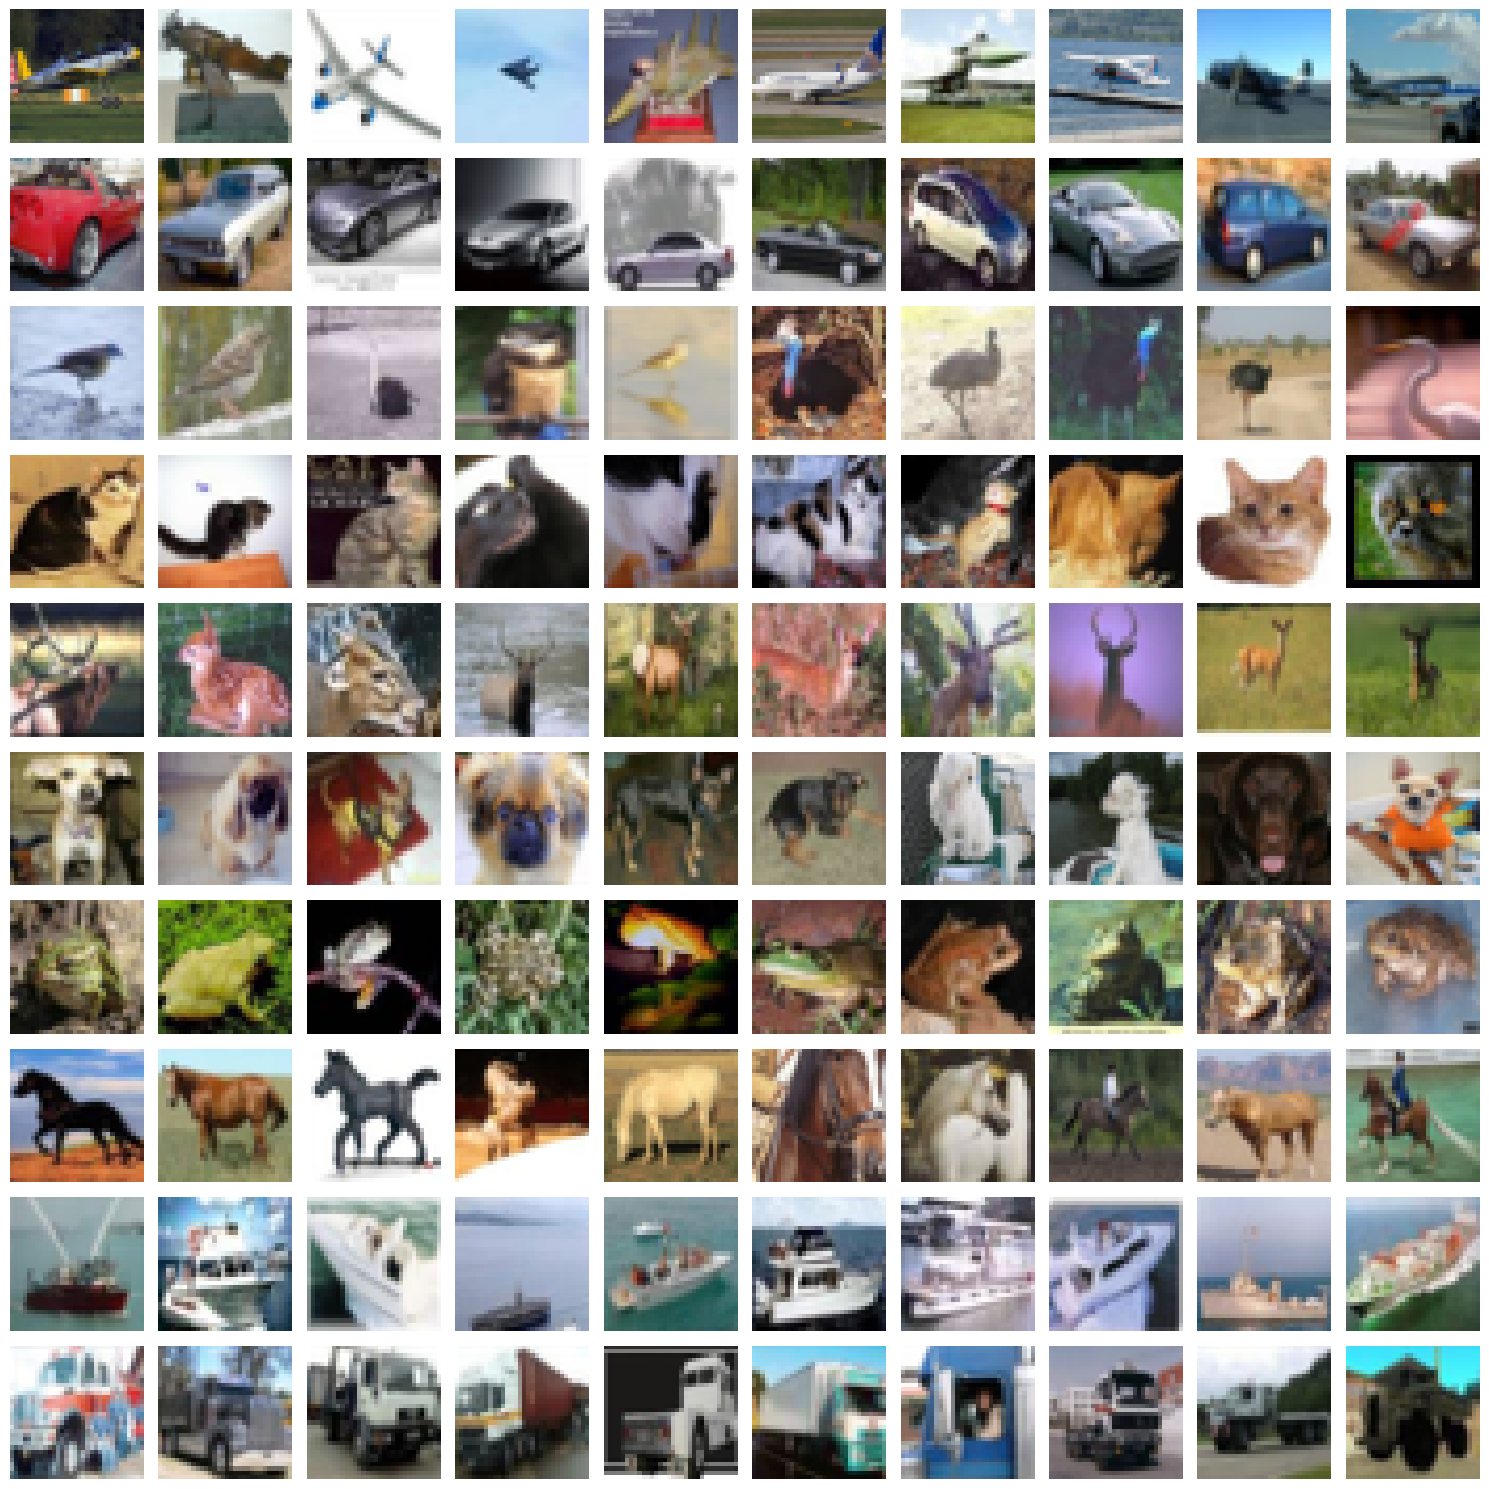

In [8]:
import matplotlib.pyplot as plt

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure and a set of subplots
fig, axes = plt.subplots(10, 10, figsize=(15, 15))

# Iterate over each class
for class_index in range(10):
    # Get the indices of the images belonging to the current class in the training set
    class_indices = np.where(y_train == class_index)[0]

    # Randomly select 10 indices from the class indices
    random_indices = np.random.choice(class_indices, 10, replace=False)

    # Iterate over the selected random indices and plot the images
    for i, image_index in enumerate(random_indices):
        row = class_index
        col = i
        axes[row, col].imshow(x_train[image_index])
        axes[row, col].axis('off')
        if col == 0:  # Add class name as y-label only for the first column
            axes[row, col].set_ylabel(class_names[class_index], rotation=90, size='large')

plt.tight_layout()
plt.show()

In [9]:
# Convert the labels to one-hot encoded form.

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)




(50000, 10)
(10000, 10)


In [10]:
# Normalize the images.

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [11]:
from keras.backend import clear_session
clear_session()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolutional front-end
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for the classifier
model.add(Flatten())

# Dense layers
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1421 - loss: 2.2827 - val_accuracy: 0.2252 - val_loss: 2.1935
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2437 - loss: 2.1603 - val_accuracy: 0.2730 - val_loss: 2.0793
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2881 - loss: 2.0514 - val_accuracy: 0.2937 - val_loss: 1.9890
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3142 - loss: 1.9641 - val_accuracy: 0.3341 - val_loss: 1.9195
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3395 - loss: 1.9115 - val_accuracy: 0.3486 - val_loss: 1.8791
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3482 - loss: 1.8767 - val_accuracy: 0.3479 - val_loss: 1.8723
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3538 - loss: 1.8526 - val_accuracy: 0.3640 - val_loss: 1.8328
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3635 - loss: 1.8333 - val_accuracy: 0.3526 - v

*   Plot the cross entropy loss curve and the accuracy curve

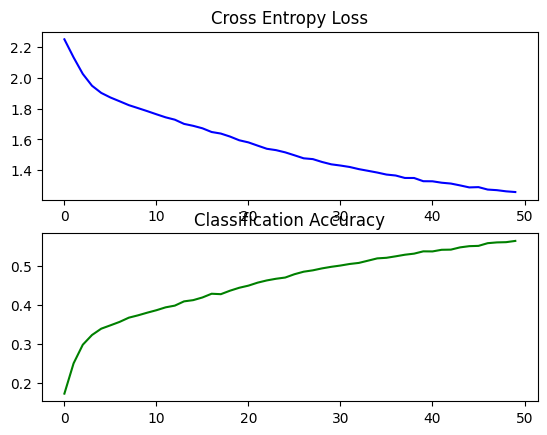

In [14]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')


# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_deeper = Sequential()

# Convolutional layers
model_deeper.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_deeper.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_deeper.add(MaxPooling2D((2, 2)))

# Flatten the output for the classifier
model_deeper.add(Flatten())

# Dense layers
model_deeper.add(Dense(128, activation='relu'))
model_deeper.add(Dense(10, activation='softmax'))

# Print the model summary
model_deeper.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [17]:
# Compile the model
model_deeper.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Train the model
history_deeper = model_deeper.fit(x_train, y_train,
                    batch_size=512,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.1534 - loss: 2.2741 - val_accuracy: 0.2247 - val_loss: 2.1551
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2505 - loss: 2.1078 - val_accuracy: 0.2798 - val_loss: 2.0068
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2911 - loss: 2.0049 - val_accuracy: 0.3273 - val_loss: 1.9129
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3284 - loss: 1.9139 - val_accuracy: 0.3454 - val_loss: 1.8621
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3531 - loss: 1.8601 - val_accuracy: 0.3660 - val_loss: 1.8108
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3695 - loss: 1.8124 - val_accuracy: 0.3639 - val_loss: 1.8139
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3787 - loss: 1.7871 - val_accuracy: 0.3788 - val_loss: 1.7559
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3888 - loss: 1.7507 - val_accuracy: 0.3951 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


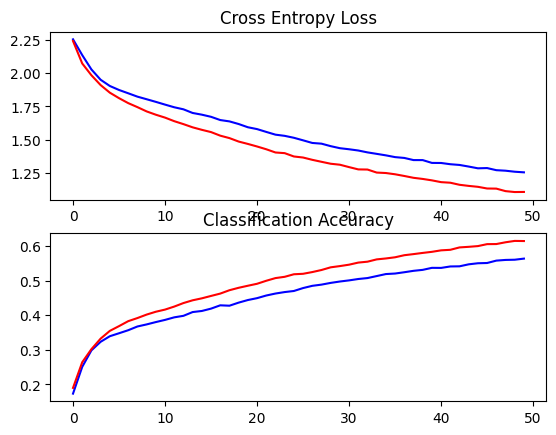

In [18]:

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train') #first model
plt.plot(history_deeper.history['loss'], color='red', label='train') #deeper model

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history_deeper.history['accuracy'], color='red', label='train') # deeper model


plt.show()

**Comment on the observation**

* deeper model has a higher accuracy and lower loss after training

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [19]:
predictions = model_deeper.predict(x_test)

import numpy as np
predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)

confusion_matrix(gt, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[681,  31,  54,   3,  22,   6,  10,  16, 147,  30],
       [ 50, 735,  14,   7,   8,   3,   7,  17,  60,  99],
       [ 89,  16, 499,  41, 141,  45,  53,  73,  29,  14],
       [ 40,  19, 122, 343, 127, 125,  82,  77,  35,  30],
       [ 45,  10, 117,  34, 600,  33,  59,  73,  21,   8],
       [ 26,   6, 106, 157, 116, 389,  45, 117,  20,  18],
       [ 23,  20, 101,  35, 124,  20, 610,  38,  16,  13],
       [ 29,  10,  42,  35,  78,  38,  18, 705,  13,  32],
       [ 94,  72,  16,  10,  20,   5,   2,   8, 747,  26],
       [ 59, 198,  14,  12,   8,   9,  15,  45,  70, 570]])

**Comment here :**

* Especially animals get confused with eachother more often

...

*    Print the test accuracy for the trained model.

In [20]:
loss, accuracy = model_deeper.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.5879


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [21]:
from keras.backend import clear_session
clear_session()

In [22]:
# from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
# def resize_images(images, target_shape):
  #  resized_images = []
   # for img in images:
    #    img = array_to_img(img)
     #   img = img.resize(target_shape)
      #  resized_images.append(img_to_array(img))
    # return np.array(resized_images)

from keras.backend import clear_session
from tensorflow.image import resize

clear_session()

x_train_resized = resize(x_train, (64, 64))
x_test_resized = resize(x_test, (64, 64))

# x_train_resized = x_train_resized.astype("float32") / 255
# x_test_resized = x_test_resized.astype("float32") / 255

print(x_train_resized.shape)
print(x_test_resized.shape)

(50000, 64, 64, 3)
(10000, 64, 64, 3)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_complete = Sequential()

from tensorflow.keras import layers, models

# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models
num_classes = 10  # Adjust this as needed
input_shape = (64, 64, 3)

model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#different solution

# layers.Input(shape=(64,64,3)),

# Convolutional layers
# model_complete.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model_complete.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model_complete.add(MaxPooling2D((2, 2)))

# model_complete.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model_complete.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model_complete.add(MaxPooling2D((2, 2)))

# model_complete.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model_complete.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model_complete.add(MaxPooling2D((2, 2)))

# Flatten the output for the classifier
# model_complete.add(Flatten())

# Dense layers
# model_complete.add(Dense(128, activation='relu'))


# Print the model summary
# model_complete.summary()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 106s 774ms/step - accuracy: 0.1075 - loss: 2.2990 - val_accuracy: 0.1343 - val_loss: 2.2853
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.1585 - loss: 2.2734 - val_accuracy: 0.1900 - val_loss: 2.1913
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - accuracy: 0.2042 - loss: 2.1657 - val_accuracy: 0.2352 - val_loss: 2.1372
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.2514 - loss: 2.0850 - val_accuracy: 0.3009 - val_loss: 2.0040
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 366ms/step - accuracy: 0.2940 - loss: 2.0034 - val_accuracy: 0.2442 - val_loss: 2.1699
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 366ms/step - accuracy: 0.3157 - loss: 1.9390 - val_accuracy: 0.3535 - val_loss: 1.8572
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.3498 - loss: 1.8455 - val_accuracy: 0.3726 - val_loss: 1.7702
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.3631 - loss: 1.7921 - val_acc

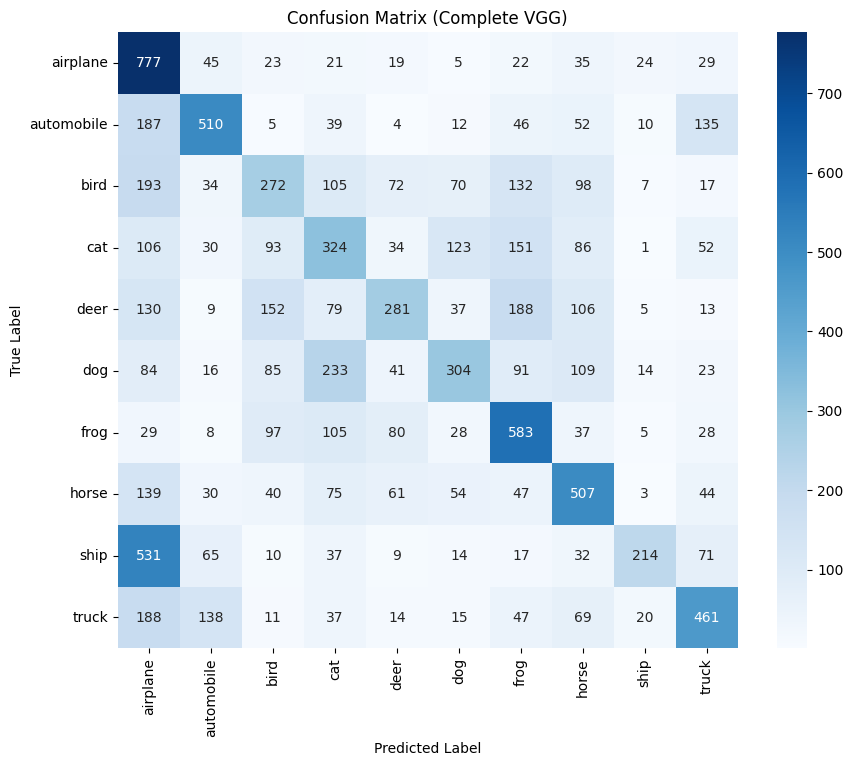

In [24]:
# Compile the model
model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train_resized, y_train,
                    batch_size=512,
                    epochs=10,
                    validation_data=(x_test_resized, y_test),
                    shuffle=True)



In [ ]:
# Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

predictions2 = model2.predict(x_test_resized)

import numpy as np
predictions2_classes = np.argmax(predictions2, axis=1)

from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)

cm2 = confusion_matrix(gt, predictions2_classes)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Complete VGG)')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
Activation functions introduce non-linearity into the network so it can learn complex patterns

2 - Key Differences between sigmoid and softmax:

Sigmoid is binary classification (1 or 0) and Softmax is Multi-class classification, so can have more than 2 classes
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary Crossentropy => Sigmond function

Categorical Crossentropy => Softmax
_
